In [134]:
# Thêm thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [135]:
data = pd.read_csv('heart.csv')
print('Kích thước bộ dữ liệu là', data.shape)

Kích thước bộ dữ liệu là (303, 14)


In [136]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [137]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [138]:

data = data[data['ca'] < 4] # xóa các giá trị sai ở cột 'ca'
data = data[data['thal'] > 0] # xóa các giá trị sai ở cột 'thal'
print(f'Độ dài của dữ liệu bây giờ là {len(data)} thay vì 303')

Độ dài của dữ liệu bây giờ là 296 thay vì 303


In [139]:
data = data.rename(
    columns = {'age': 'Tuổi',
               'sex': 'Giới tính',
               'cp':'Loại đau ngực', 
               'trestbps':'Huyết áp khi nghỉ ngơi', 
               'chol': 'Cholesterol trong máu',
               'fbs': 'Đường huyết lúc đói',
               'restecg' : 'Kết quả điện tâm đồ lúc nghỉ ngơi', 
               'thalach': 'Nhịp tim tối đa khi gắng sức', 
               'exang': 'Đau thắt ngực do gắng sức',
               'oldpeak': 'Sự chênh lệch ST', 
               'slope': 'Độ dốc đoạn ST', 
               'ca':'Số mạch máu chính bị hẹp', 
               'thal': 'Thalassemia'}, 
    errors="raise")

In [140]:
data['Giới tính'][data['Giới tính'] == 0] = 'Nữ'
data['Giới tính'][data['Giới tính'] == 1] = 'Nam'

data['Loại đau ngực'][data['Loại đau ngực'] == 0] = 'Đau thắt điển hình'
data['Loại đau ngực'][data['Loại đau ngực'] == 1] = 'Đau thắt ngực không điển hình'
data['Loại đau ngực'][data['Loại đau ngực'] == 2] = 'Không đau thắt'
data['Loại đau ngực'][data['Loại đau ngực'] == 3] = 'Không có triệu chứng'

data['Đường huyết lúc đói'][data['Đường huyết lúc đói'] == 0] = 'Thấp hơn 120mg/ml'
data['Đường huyết lúc đói'][data['Đường huyết lúc đói'] == 1] = 'Cao hơn 120mg/ml'

data['Kết quả điện tâm đồ lúc nghỉ ngơi'][data['Kết quả điện tâm đồ lúc nghỉ ngơi'] == 0] = 'Bình thường'
data['Kết quả điện tâm đồ lúc nghỉ ngơi'][data['Kết quả điện tâm đồ lúc nghỉ ngơi'] == 1] = 'ST-T bất thường'
data['Kết quả điện tâm đồ lúc nghỉ ngơi'][data['Kết quả điện tâm đồ lúc nghỉ ngơi'] == 2] = 'Bất thường khác'

data['Đau thắt ngực do gắng sức'][data['Đau thắt ngực do gắng sức'] == 0] = 'Không'
data['Đau thắt ngực do gắng sức'][data['Đau thắt ngực do gắng sức'] == 1] = 'Có'

data['Độ dốc đoạn ST'][data['Độ dốc đoạn ST'] == 0] = 'Dốc lên'
data['Độ dốc đoạn ST'][data['Độ dốc đoạn ST'] == 1] = 'Bằng phẳng'
data['Độ dốc đoạn ST'][data['Độ dốc đoạn ST'] == 2] = 'Dốc xuống'

data['Thalassemia'][data['Thalassemia'] == 1] = 'Khuyết tật cố định'
data['Thalassemia'][data['Thalassemia'] == 2] = 'Bình thường'
data['Thalassemia'][data['Thalassemia'] == 3] = 'Khuyết tật có thể chỉnh'

C:\Users\VUHOANG\AppData\Local\Temp\ipykernel_8812\3310812760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Giới tính'][data['Giới tính'] == 0] = 'Nữ'
C:\Users\VUHOANG\AppData\Local\Temp\ipykernel_8812\3310812760.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nữ' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['Giới tính'][data['Giới tính'] == 0] = 'Nữ'
C:\Users\VUHOANG\AppData\Local\Temp\ipykernel_8812\3310812760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loại đau ngực']

In [141]:
data.dtypes

Tuổi                                   int64
Giới tính                             object
Loại đau ngực                         object
Huyết áp khi nghỉ ngơi                 int64
Cholesterol trong máu                  int64
Đường huyết lúc đói                   object
Kết quả điện tâm đồ lúc nghỉ ngơi     object
Nhịp tim tối đa khi gắng sức           int64
Đau thắt ngực do gắng sức             object
Sự chênh lệch ST                     float64
Độ dốc đoạn ST                        object
Số mạch máu chính bị hẹp               int64
Thalassemia                           object
target                                 int64
dtype: object

In [142]:
data.head()

,Tuổi,Giới tính,Loại đau ngực,Huyết áp khi nghỉ ngơi,Cholesterol trong máu,Đường huyết lúc đói,Kết quả điện tâm đồ lúc nghỉ ngơi,Nhịp tim tối đa khi gắng sức,Đau thắt ngực do gắng sức,Sự chênh lệch ST,Độ dốc đoạn ST,Số mạch máu chính bị hẹp,Thalassemia,target
0,63,Nam,Không có triệu chứng,145,233,Cao hơn 120mg/ml,Bình thường,150,Không,2.3,Dốc lên,0,Khuyết tật cố định,1
1,37,Nam,Không đau thắt,130,250,Thấp hơn 120mg/ml,ST-T bất thường,187,Không,3.5,Dốc lên,0,Bình thường,1
2,41,Nữ,Đau thắt ngực không điển hình,130,204,Thấp hơn 120mg/ml,Bình thường,172,Không,1.4,Dốc xuống,0,Bình thường,1
3,56,Nam,Đau thắt ngực không điển hình,120,236,Thấp hơn 120mg/ml,ST-T bất thường,178,Không,0.8,Dốc xuống,0,Bình thường,1
4,57,Nữ,Đau thắt điển hình,120,354,Thấp hơn 120mg/ml,ST-T bất thường,163,Có,0.6,Dốc xuống,0,Bình thường,1


In [143]:
# Thuộc tính số
num_feats = ['Tuổi', 'Cholesterol trong máu', 'Huyết áp khi nghỉ ngơi', 'Nhịp tim tối đa khi gắng sức', 'Sự chênh lệch ST', 'Số mạch máu chính bị hẹp']
# Phân loại (binary)
bin_feats = ['Giới tính', 'Đường huyết lúc đói', 'Đau thắt ngực do gắng sức', 'target']
# Phân loại (multi-)
nom_feats= ['Loại đau ngực', 'Kết quả điện tâm đồ lúc nghỉ ngơi', 'Độ dốc đoạn ST', 'Thalassemia']
cat_feats = nom_feats + bin_feats

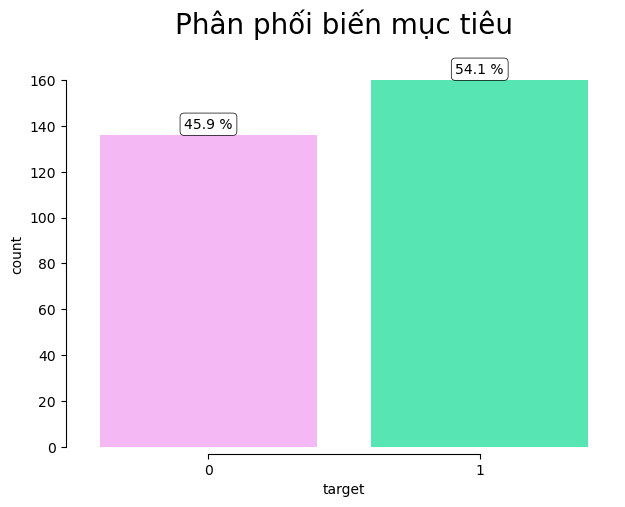

In [144]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='White')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('white')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Phân phối biến mục tiêu', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [145]:
#thống kê tóm tắt cho từng cột số 
# .T: để chuyển từ cột sang hàng
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
Tuổi,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
Cholesterol trong máu,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
Huyết áp khi nghỉ ngơi,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
Nhịp tim tối đa khi gắng sức,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
Sự chênh lệch ST,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
Số mạch máu chính bị hẹp,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử data là DataFrame của bạn
data['target'] = data['target'].astype(str)



C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

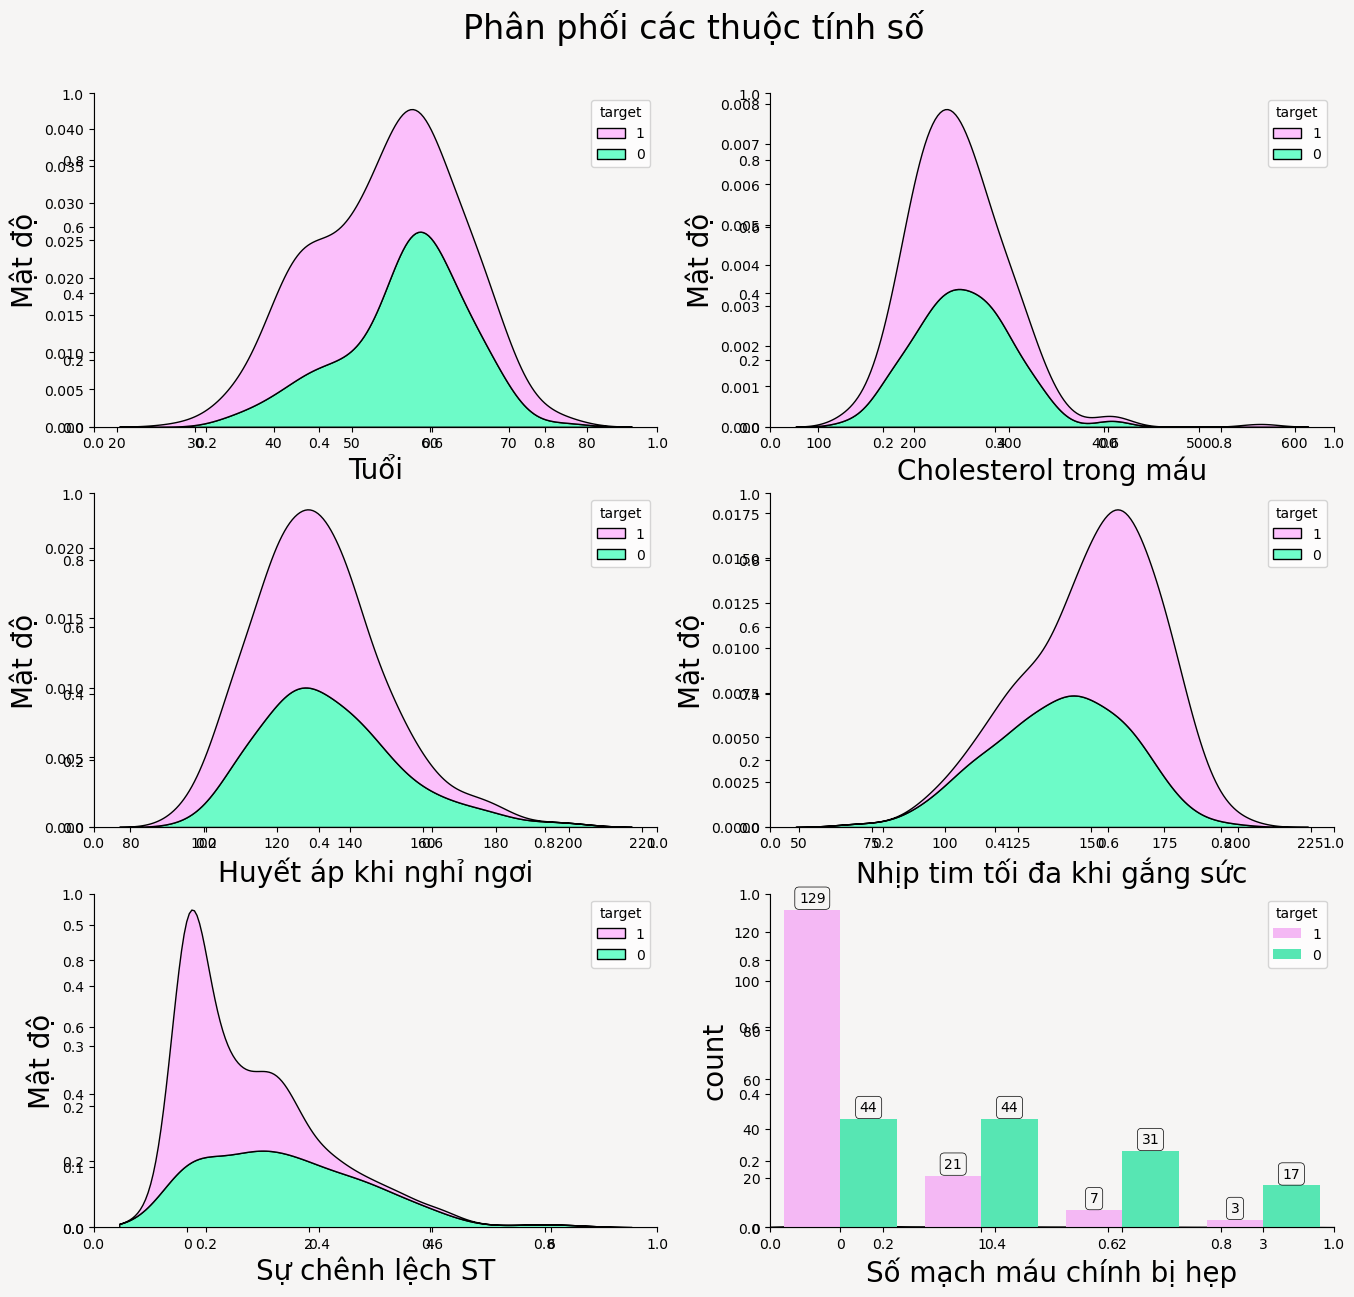

In [147]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("Mật độ", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'Số mạch máu chính bị hẹp':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Phân phối các thuộc tính số' ,fontsize = 24);

C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

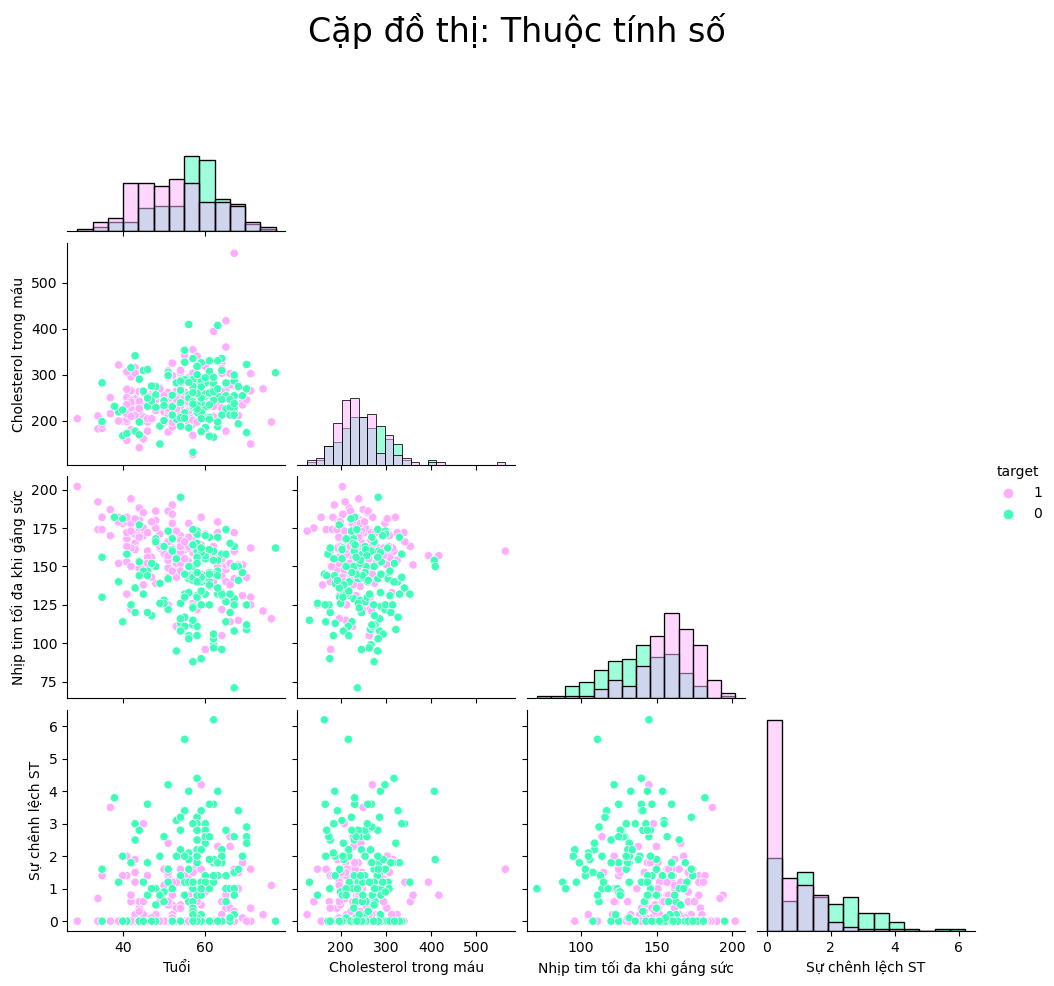

In [148]:

a = ['Tuổi', 'Cholesterol trong máu', 'Kết quả điện tâm đồ lúc nghỉ ngơi', 'Nhịp tim tối đa khi gắng sức', 'Sự chênh lệch ST', 'target']
data_ = data[a]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Cặp đồ thị: Thuộc tính số ' ,fontsize = 24);

In [149]:
# fig, ax = plt.subplots(1,4, figsize=(22, 4))
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Cholesterol trong máu', ax = ax[0], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Cholesterol trong máu', ax = ax[0], color=mypal[5], label='0')
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Nhịp tim tối đa khi gắng sức', ax = ax[1], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Nhịp tim tối đa khi gắng sức', ax = ax[1], color=mypal[5], label='0')
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Kết quả điện tâm đồ lúc nghỉ ngơi', ax = ax[2], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Kết quả điện tâm đồ lúc nghỉ ngơi', ax = ax[2], color=mypal[5], label='0')
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Sự chênh lệch ST', ax = ax[3], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Sự chênh lệch ST', ax = ax[3], color=mypal[5], label='0')
# plt.suptitle('Biểu đồ của các thuộc tính được chọn')
# plt.legend();

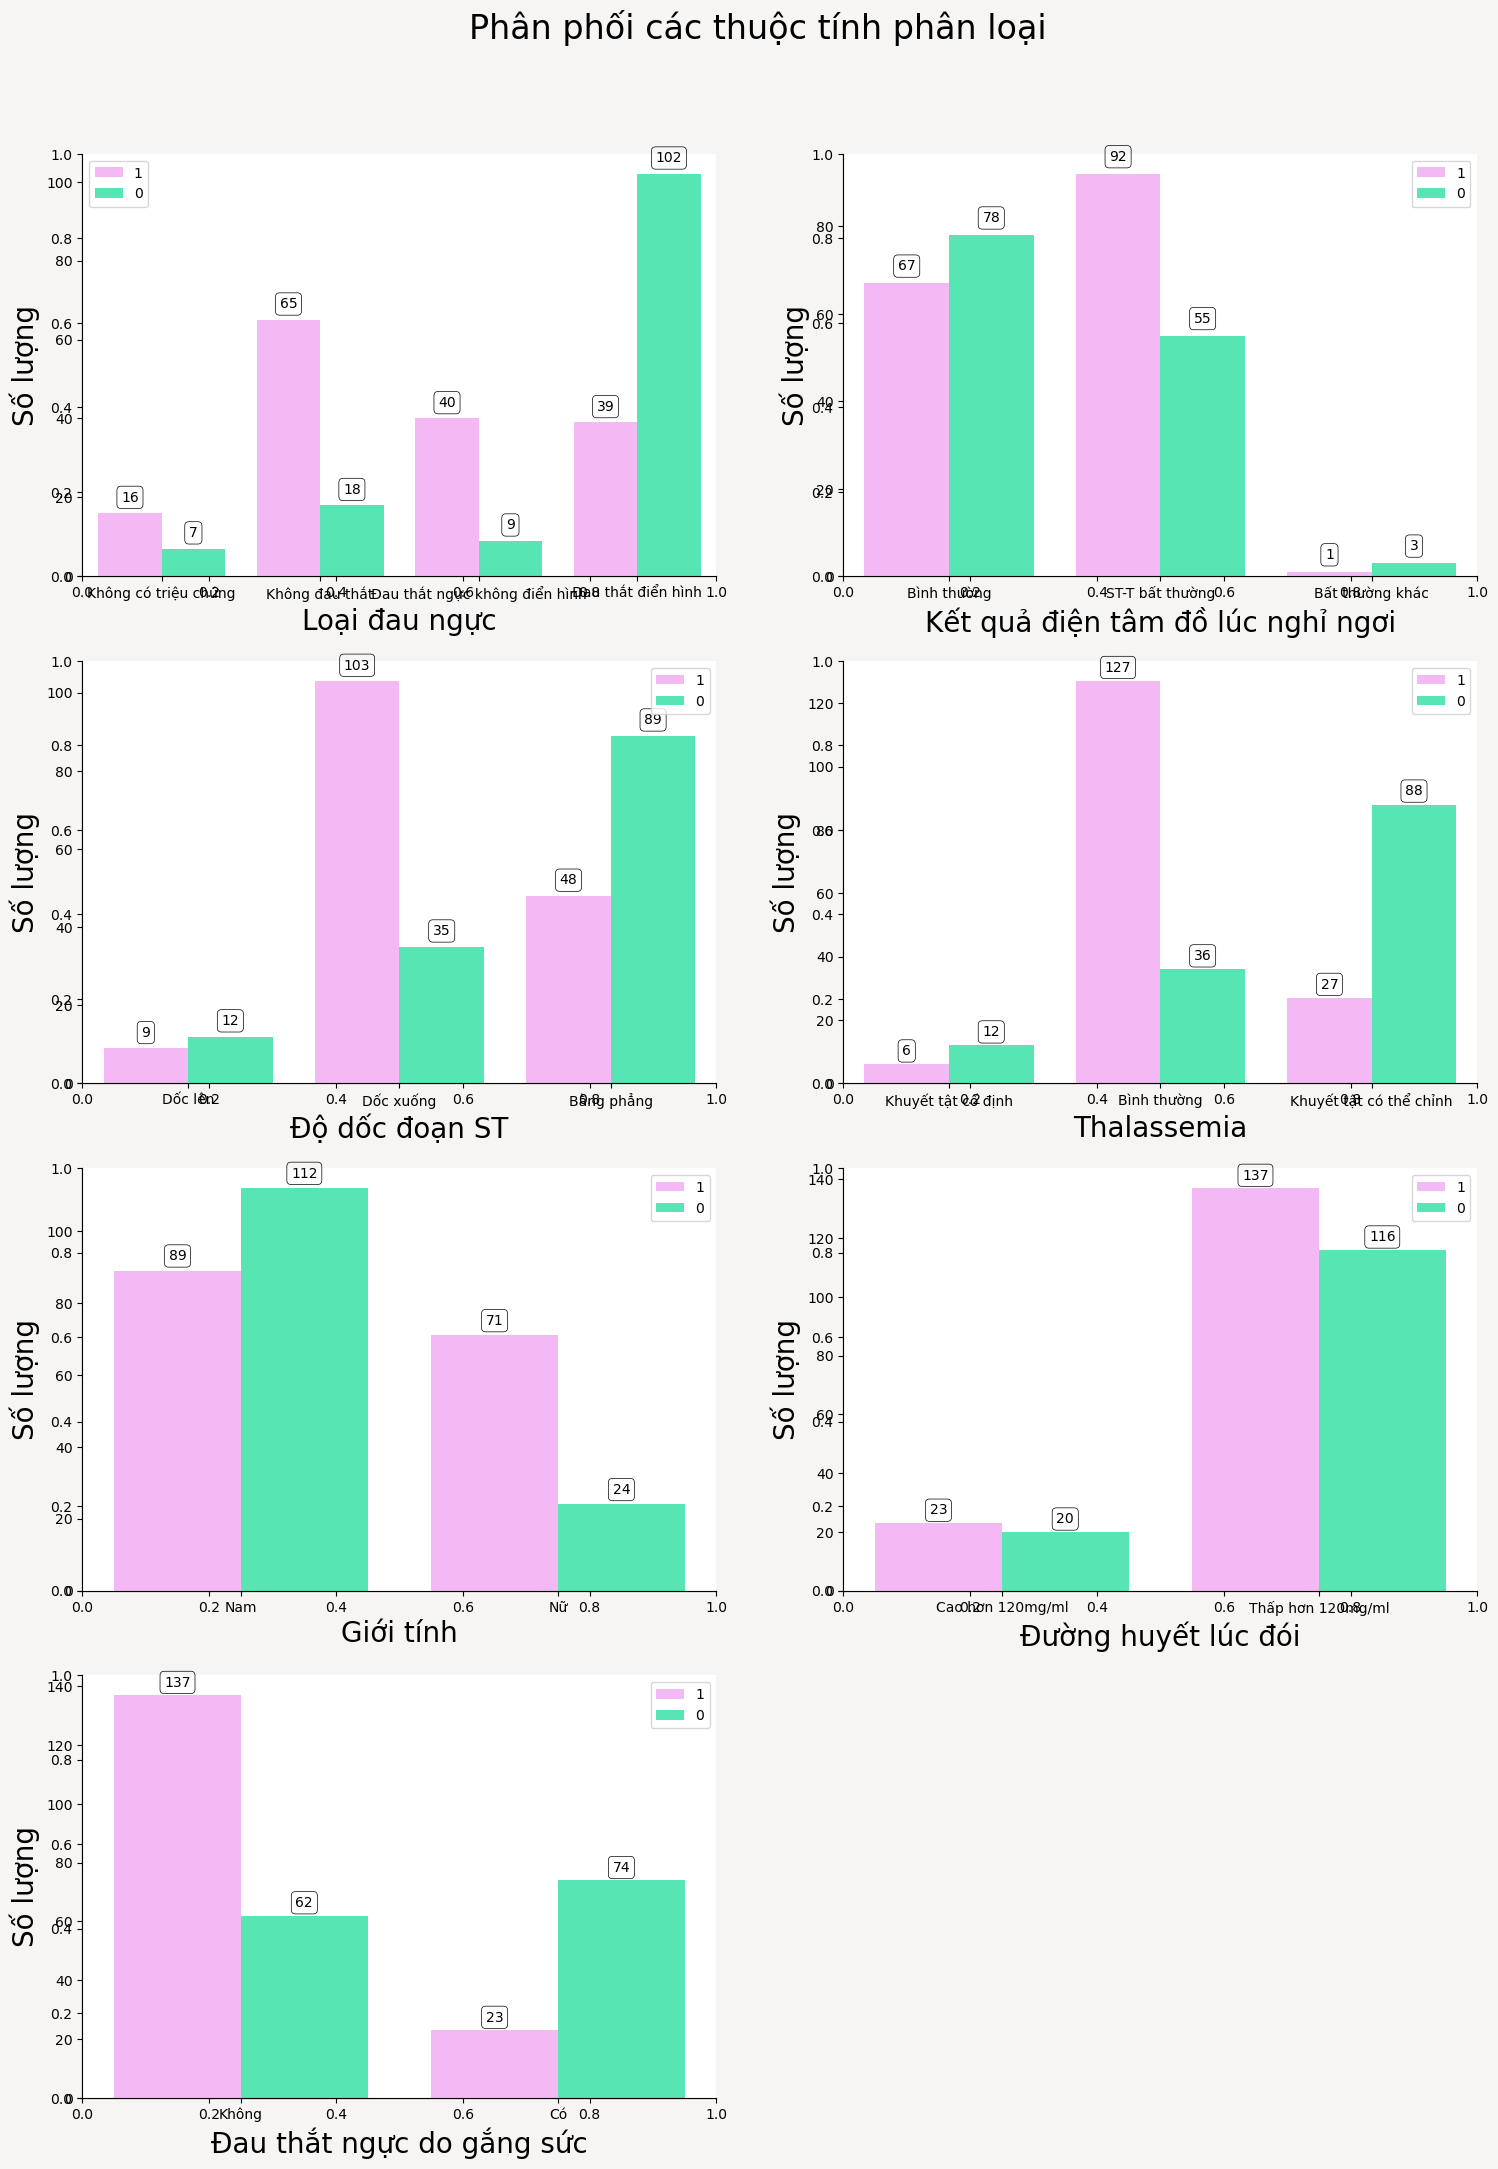

In [150]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='white')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("Số lượng", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='white')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Phân phối các thuộc tính phân loại' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


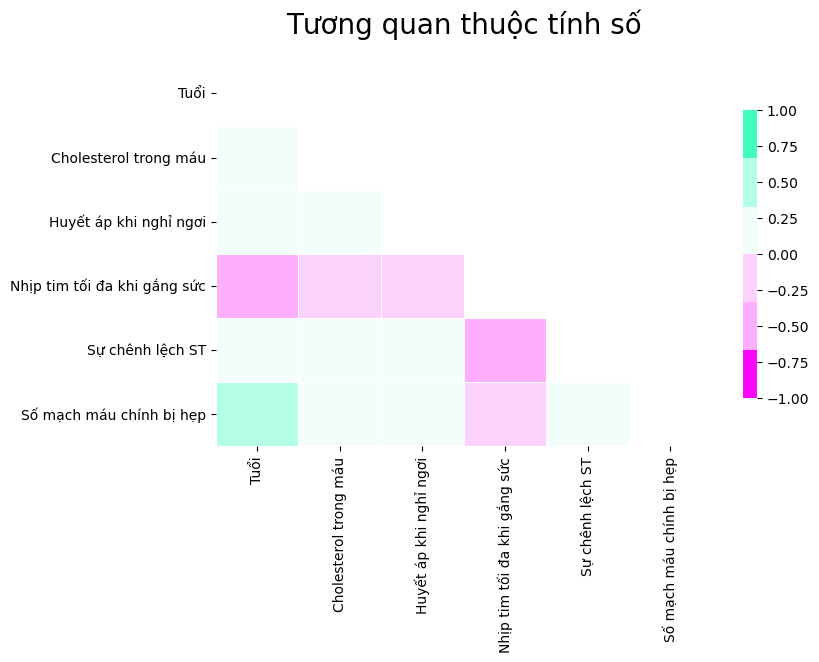

In [151]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Tương quan thuộc tính số", fontsize=20, y= 1.05);

C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


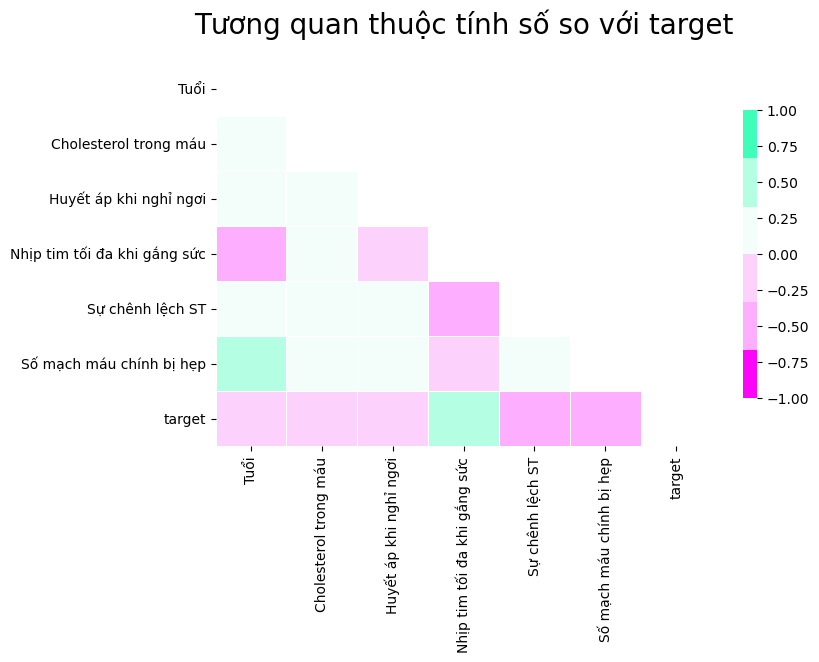

In [158]:
feats_ = ['Tuổi', 'Cholesterol trong máu', 'Huyết áp khi nghỉ ngơi', 'Nhịp tim tối đa khi gắng sức', 'Sự chênh lệch ST', 'Số mạch máu chính bị hẹp', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]
# Chuyển đổi các cột cần thiết sang kiểu số nếu có thể
for col in feats_:
    data[col] = pd.to_numeric(data[col], errors='coerce')
rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Tương quan thuộc tính số so với target", fontsize=20, y= 1.05);

C:\Users\VUHOANG\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


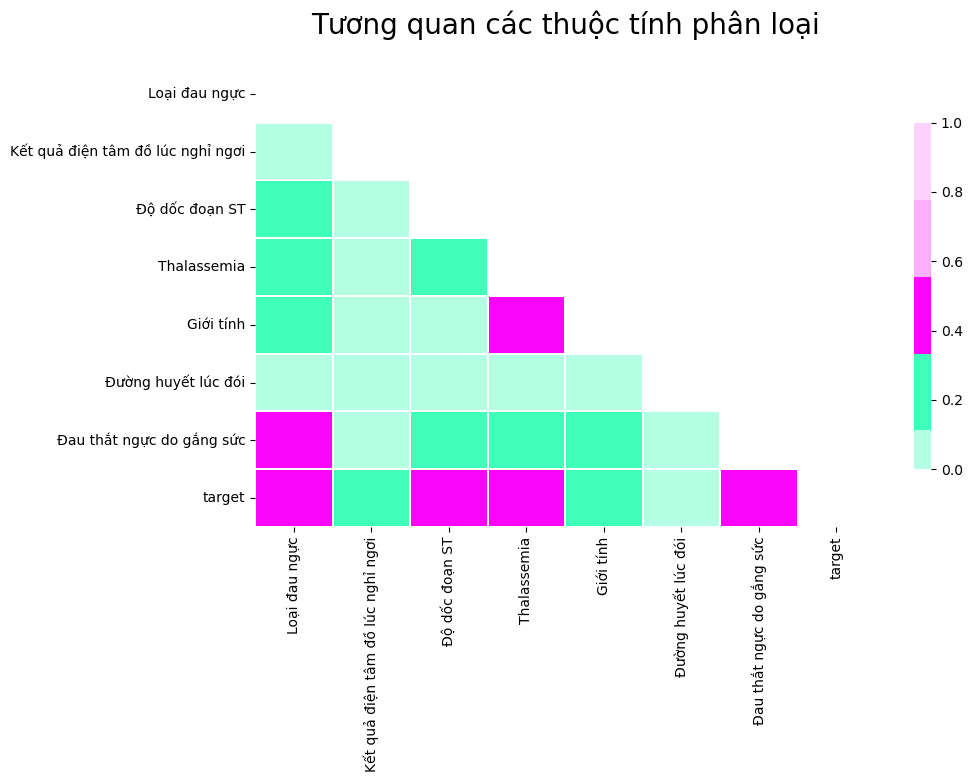

In [159]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Tương quan các thuộc tính phân loại", fontsize=20, y= 1.05);